In [1]:
# To execute the multiple lines of code at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

## Step-1 Load the data

In [3]:
df=pd.read_csv(r'C:\Data\diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Step-2 Perform EDA on dataset

In [4]:
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)
df.head(1)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [5]:
#To check the null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
dtype: int64

In [6]:
df.describe()

,carat,depth %,table %,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth %  53940 non-null  float64
 5   table %  53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   depth    53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


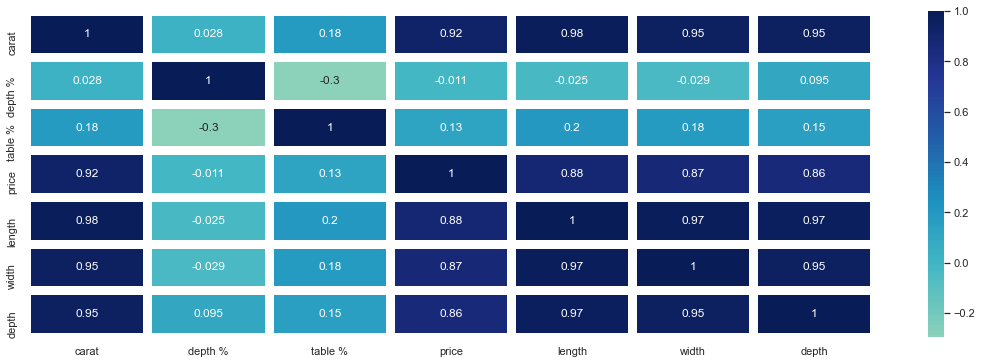

In [8]:
#To find the correlation of all features
plt.subplots(figsize=(19, 6))
sns.heatmap(df.corr(), annot=True, linewidths=8, center=0, cmap="YlGnBu");

### Observation:
    From the above plot, We can see that carat, length, width, depth, and price are having 
    a high correlation with each other.

## Color Vs Price

<AxesSubplot:xlabel='color', ylabel='price'>

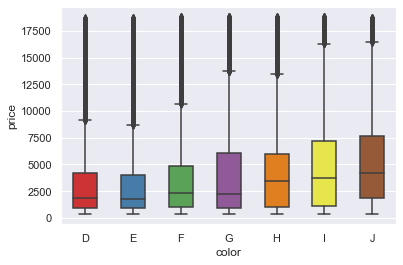

In [9]:
sns.boxplot(y='price',data=df,x='color',palette ='Set1',width =0.5,order = ['D','E','F','G','H','I','J'] )

### Observation:
   * I and J color has highest prices of all remaining colors
   * G, H, I and J type color has less number of outliers compared to D and E.It suggests that the better the quality of color the higher the outliers except for G type color.

## Cut Vs Price

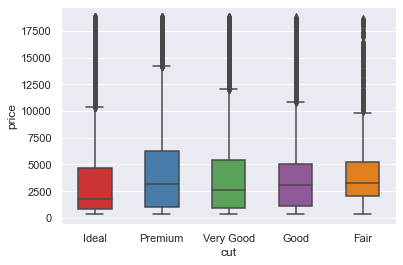

In [10]:
sns.boxplot(y='price',data=df,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] );

### Observation: 
   * Premium cut has highest price of all
   * Fair..is the lower the quality of cut, the higher the number of outliers except for the Ideal cut type.

## Clarity Vs Price

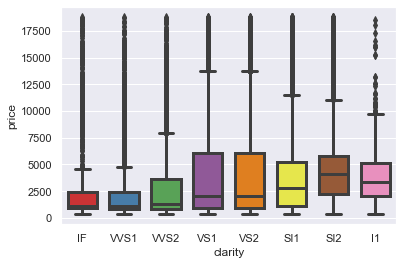

In [11]:
sns.boxplot(y='price',data=df,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']);

### Observation:
   * Diamonds with clarity VS1 and VS2 has more prices.
   * IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.

## Clarity vs cut

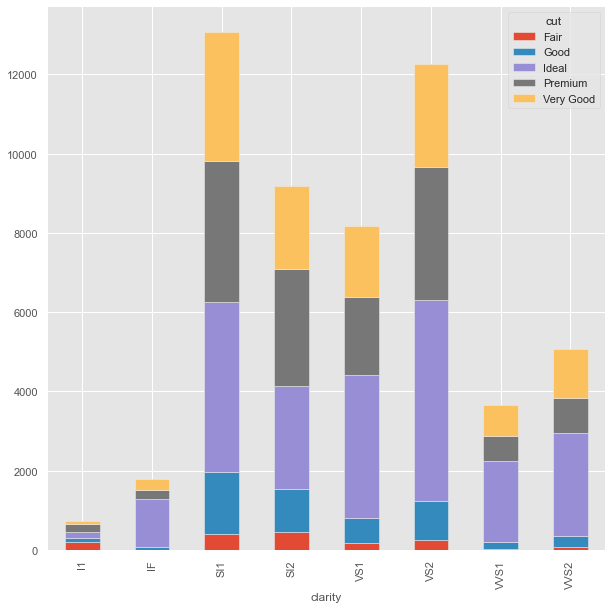

In [12]:
plt.style.use('ggplot')
clarity_cut_table = pd.crosstab(index=df["clarity"], columns=df["cut"])

clarity_cut_table.plot(kind="bar", figsize=(10,10),stacked=True)
plt.show();

### Observation:
We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category.

## Cut vs clarity

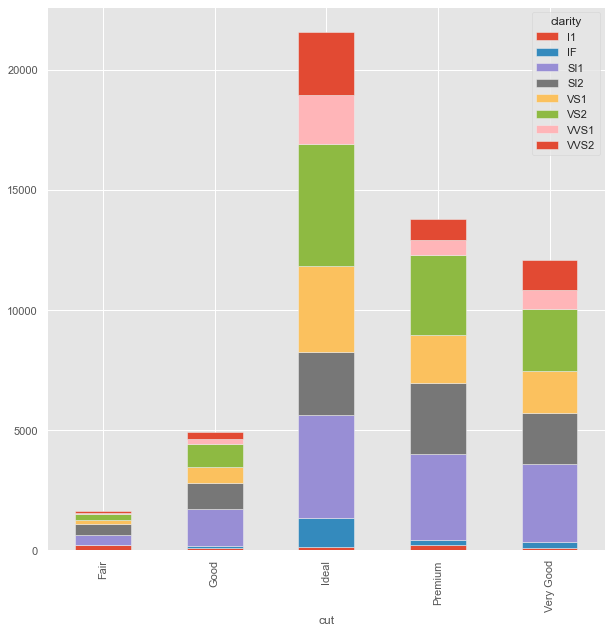

In [13]:
plt.style.use('ggplot')
clarity_cut_table = pd.crosstab(index=df["cut"], columns=df["clarity"])

clarity_cut_table.plot(kind="bar", figsize=(10,10),stacked=True)
plt.show();

### Observation:
    It is good to prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.

## Color vs clarity

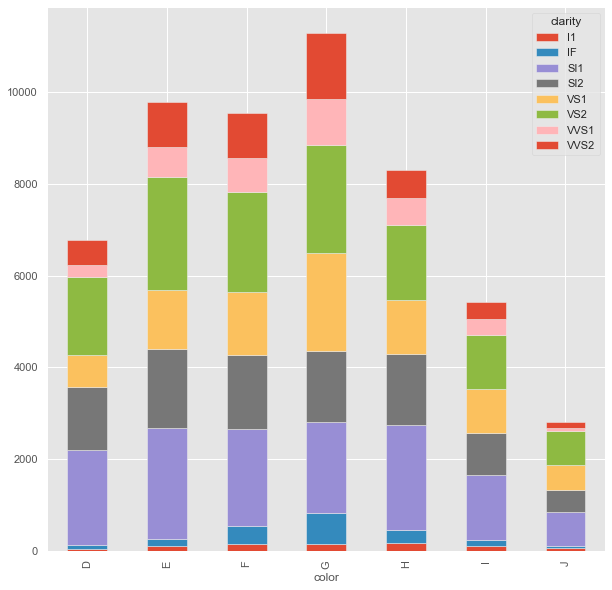

In [14]:
plt.style.use('ggplot')
clarity_cut_table = pd.crosstab(index=df["color"], columns=df["clarity"])

clarity_cut_table.plot(kind="bar", figsize=(10,10),stacked=True)
plt.show();

### Observation:
     It is good to prefer G color followed by E, F, and H.In that the clarity they mostly prefer SI1 or SI2 category.

Therefore from above all the plots, we can conclude that carat has high importance followed by cut, color, and clarity in predicting the price of a diamond.

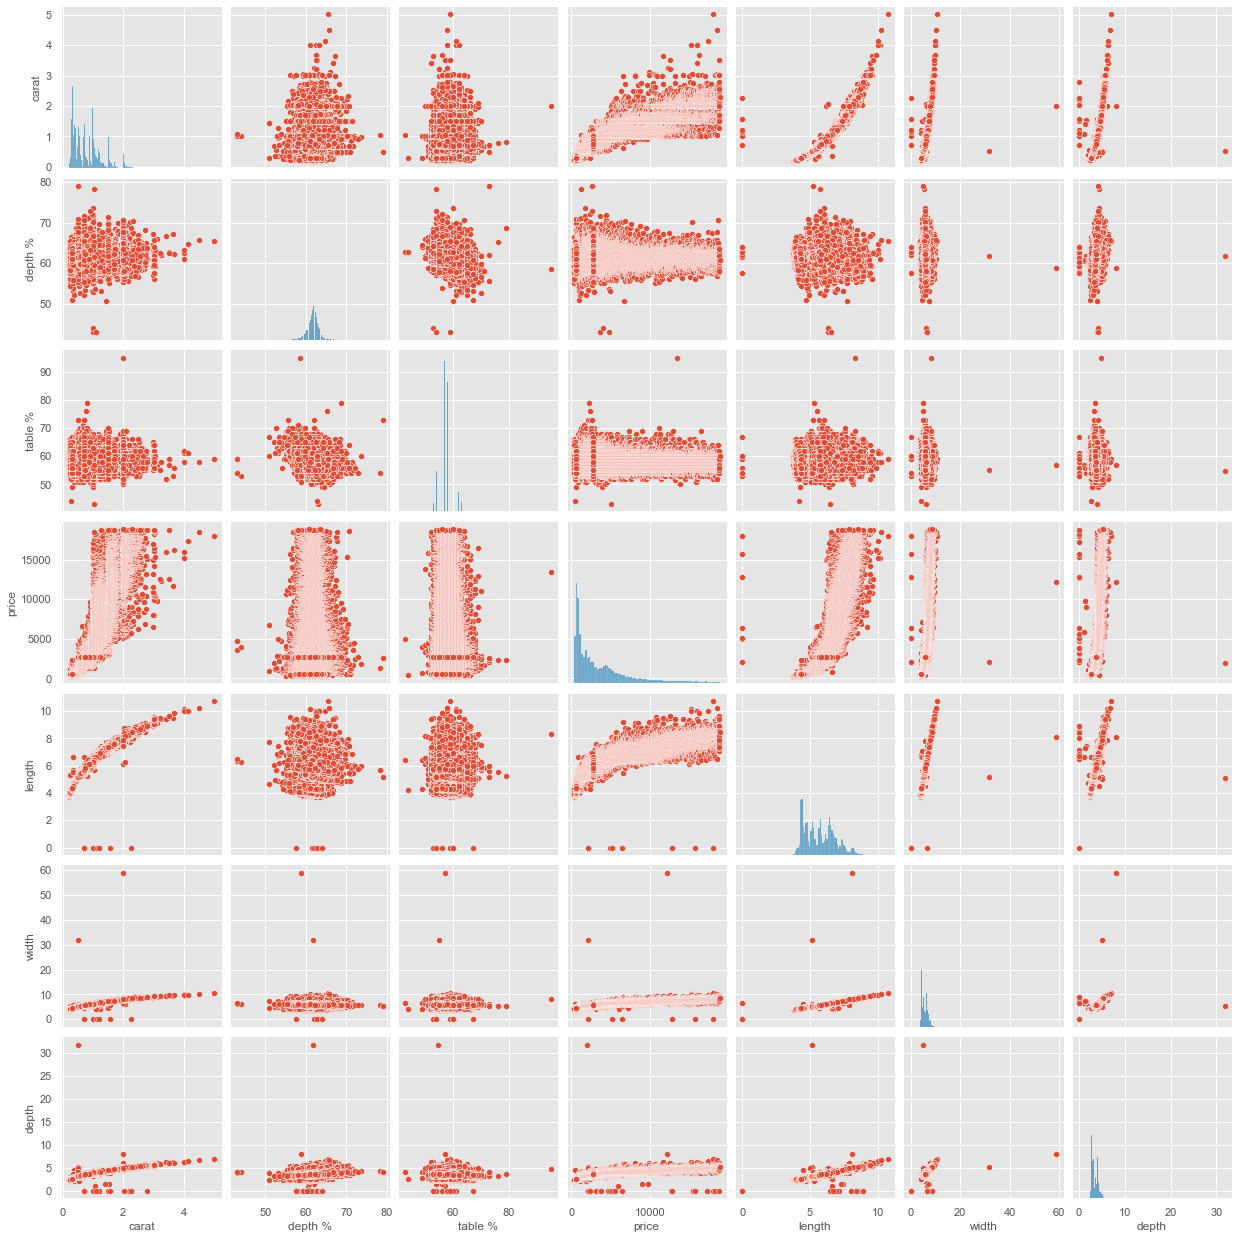

In [15]:
sns.pairplot(df);

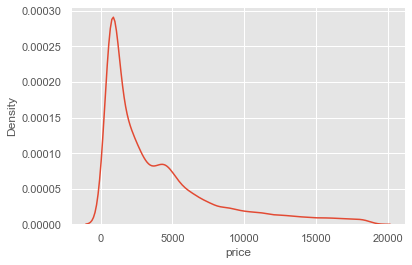

In [16]:
sns.kdeplot(df.price);

## Step-3 Handling Categorical features

In [18]:
#check the unique items in the categorical features so that we can give the priority values while converting the labels
df.cut.unique()
df.color.unique()
df.clarity.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [19]:
label = {'Ideal':4, 'Fair':0,'Good':1,'Very Good':2, 'Premium':3}
label1={'E':5, 'I':1, 'J':0, 'H':2, 'F':4, 'G':3, 'D':6}
label2={'SI2':1, 'SI1':2, 'VS1':4, 'VS2':3, 'VVS2':5, 'VVS1':6, 'I1':0, 'IF':7}

In [20]:
df['cut'] = df['cut'].map(lambda x: label[x])
df['color'] = df['color'].map(lambda x: label1[x])
df['clarity'] = df['clarity'].map(lambda x: label2[x])

In [21]:
df

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth %  53940 non-null  float64
 5   table %  53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   depth    53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


### Data Preparation

In [23]:
target=df['price']
df=df.drop("price",axis=1)

In [24]:
df.shape
target.shape

(53940, 9)

(53940,)

### Step-4 Normalizing the data

In [25]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth %', 'table %', 'length',
       'width', 'depth'],
      dtype='object')

In [26]:
# using the scratch data
data=df[['carat', 'cut', 'color', 'clarity', 'depth %', 'table %', 'length','width', 'depth']]
data=data.apply(lambda x :(x-x.min(axis=0))/ (x.max(axis=0)-x.min(axis=0)))

In [27]:
data.head()

,carat,cut,color,clarity,depth %,table %,length,width,depth
0,0.006237,1.00,0.833333,0.142857,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,0.75,0.833333,0.285714,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,0.25,0.833333,0.571429,0.386111,0.423077,0.377095,0.069100,0.072642
3,0.018711,0.75,0.166667,0.428571,0.538889,0.288462,0.391061,0.071817,0.082704
4,0.022869,0.25,0.000000,0.142857,0.563889,0.288462,0.404097,0.073854,0.086478


## Step-5 Train-Test split

In [28]:
#Using scratch data
i=int((data.shape[0])*0.75)
j=int((data.shape[0])*0.25)

idx = np.hstack((np.ones(i), np.zeros(j))) # generate indices
np.random.shuffle(idx) # shuffle to make training data and test data random

x_train = data[idx == 1]
x_test = data[idx == 0]

y_train = target[idx == 1]
y_test = target[idx == 0]

print(x_train)
print(x_test)

          carat   cut     color   clarity   depth %   table %    length  \
1      0.002079  0.75  0.833333  0.285714  0.466667  0.346154  0.362197   
2      0.006237  0.25  0.833333  0.571429  0.386111  0.423077  0.377095   
3      0.018711  0.75  0.166667  0.428571  0.538889  0.288462  0.391061   
4      0.022869  0.25  0.000000  0.142857  0.563889  0.288462  0.404097   
6      0.008316  0.50  0.166667  0.857143  0.536111  0.269231  0.367784   
...         ...   ...       ...       ...       ...       ...       ...   
53933  0.103950  0.50  0.833333  0.428571  0.505556  0.307692  0.529795   
53934  0.108108  0.75  1.000000  0.285714  0.547222  0.307692  0.529795   
53935  0.108108  1.00  1.000000  0.285714  0.494444  0.269231  0.535382   
53938  0.137214  0.75  0.333333  0.142857  0.500000  0.288462  0.572626   
53939  0.114345  1.00  1.000000  0.142857  0.533333  0.230769  0.542831   

          width     depth  
1      0.065195  0.072642  
2      0.069100  0.072642  
3      0.071817

In [29]:
print(y_train)
print(y_test)

1         326
2         327
3         334
4         335
6         336
         ... 
53933    2757
53934    2757
53935    2757
53938    2757
53939    2757
Name: price, Length: 40455, dtype: int64
0         326
5         336
9         338
19        351
22        353
         ... 
53907    2753
53911    2753
53928    2756
53936    2757
53937    2757
Name: price, Length: 13485, dtype: int64


## Step- 6 Numpy Broadcasting( Traing a model & prediction )

In [30]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

#Using scratch
distance=np.zeros(y_test.shape)
y_pred=np.zeros(y_test.shape)
k=3
for i in range(len(x_test)):
    distance=np.sqrt(((x_test[i]-x_train)**2).sum(axis=1))
    sort_value=(np.argsort(distance))
    sort_value=sort_value[:k]
    y_pred[i]=y_train[sort_value].mean()
print(y_pred)

[ 464.66666667  599.          526.         ... 2749.33333333 2624.66666667
 2639.        ]


In [31]:
act_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
act_pred

,Actual,Predicted
0,326,464.666667
1,336,599.000000
2,338,526.000000
3,351,366.666667
4,353,419.000000
...,...,...
13480,2753,2762.666667
13481,2753,2686.333333
13482,2756,2749.333333
13483,2757,2624.666667


## Step-7 Evaluation

In [32]:
print('Mean  Squared Error: ',(np.square(y_test - y_pred)).mean())
print('Mean Absolute Error: ', np.sqrt(np.square(y_test - y_pred)).mean())
print('Root Mean Squared Error: ',np.sqrt(((y_test - y_pred)**2).mean()))

Mean  Squared Error:  503809.44245869905
Mean Absolute Error:  366.1176121616611
Root Mean Squared Error:  709.7953525197943


In [33]:
correlation = np.corrcoef(y_test, y_pred)[0,1]
print('R-squared: ',(correlation**2)*100)

R-squared:  96.7936647702873


## Now look into the same thing using **sklearn** & it is working like a PRO

## Step-8

### Load the data 

In [68]:
df=pd.read_csv(r'C:\Data\diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Handling Categorical features

In [69]:
#Use Label Encoding......This is for to convert the categorical features into numerical features
#from sklearn import preprocessing
#label_encoder=preprocessing.LabelEncoder()
#df['cut']=label_encoder.fit_transform(df['cut'])
#df['color']=label_encoder.fit_transform(df['color'])
#df['clarity']=label_encoder.fit_transform(df['clarity'])

In [70]:
#Doing this because LabelEncoder doesnot give the correct order ....to get priority order based on cut, clarity,color i done this format 
df['cut'] = df['cut'].map({'Ideal':4, 'Fair':0,'Good':1,'Very Good':2, 'Premium':3})
df['color'] = df['color'].map({'E':5, 'I':1, 'J':0, 'H':2, 'F':4, 'G':3, 'D':6})
df['clarity'] = df['clarity'].map({'SI2':1, 'SI1':2, 'VS1':4, 'VS2':3, 'VVS2':5, 'VVS1':6, 'I1':0, 'IF':7})

# simply we can replace with order
#df['clarity']=df['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[7,6,5,4,3,2,1,0])
#df['color'] = df['color'].replace(['D','E','F','G','H','I','J'],[6,5,4,3,2,1,0])
#df['cut'] = df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[4,3,2,1,0])

### Data Preparation


In [71]:
target=df['price']
df=df.drop("price",axis=1)

In [72]:
df

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,5,1,61.5,55.0,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,6.15,6.12,3.74


In [73]:
df.shape
target.shape

(53940, 9)

(53940,)

### Normalizing the data


In [74]:
# using Modules from sklearn
from sklearn.preprocessing import MinMaxScaler
rescale=MinMaxScaler()
independent_features=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
normalize_train_data=rescale.fit_transform(df.loc[:,independent_features])
print(normalize_train_data.shape, type(normalize_train_data))


(53940, 9) <class 'numpy.ndarray'>


In [75]:
normalize_train_data=pd.DataFrame(normalize_train_data)

### Train-Test split

In [76]:
# Using sklearn module
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test=train_test_split(normalize_train_data,target,train_size=0.75,random_state=0)
X_train.shape

(40455, 9)

In [77]:
print(X_train.shape,Y_train.shape,X_test.shape, Y_test.shape)


(40455, 9) (40455,) (13485, 9) (13485,)


### Training the model


In [78]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, Y_train)

KNeighborsRegressor()

### Prediction


In [79]:
Y_pred=regressor.predict(X_test)
print(Y_pred)

[4664.4 6809.8 5458.2 ... 3383.2 2804.  1386.8]


In [80]:
act_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
act_pred

,Actual,Predicted
10176,4733,4664.4
16083,6424,6809.8
13420,5510,5458.2
20407,8770,12222.6
8909,4493,5546.8
...,...,...
52283,2494,2181.4
10789,4861,3615.6
1190,2932,3383.2
3583,3422,2804.0


### Evaluation

In [81]:
from sklearn import metrics
metrics.mean_squared_error(Y_test,Y_pred)

print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

print('R-square: ',metrics.r2_score(Y_test, Y_pred))


548187.9369314053

Mean Absolute Error:  369.3727252502781
Mean Squared Error:  548187.9369314053
Root Mean Squared Error:  740.3971481113399
R-square:  0.9656770485656202


### Numpy Broadcasting(Scratch) Evaluation:

* Mean  Squared Error:  503809.44245869905
* Mean Absolute Error:  366.1176121616611
* Root Mean Squared Error:  709.7953525197943
* R-squared:  96.7936647702873

## Comparing R2 scores

* Accuracy calculated using Numpy Broadcasting :   0.967936647702873
* Accuracy calculated using sklearn            :   0.9656770485656202